In [3]:
import pandas as pd
import numpy as np
import seaborn as sns       

In [2]:
penguins_df = pd.read_csv('data/penguins_regression.csv')

penguins_df.head()

,Flipper Length (mm),Body Mass (g)
0,181.0,3750.0
1,186.0,3800.0
2,195.0,3250.0
3,193.0,3450.0
4,190.0,3650.0


<AxesSubplot:xlabel='Flipper Length (mm)', ylabel='Body Mass (g)'>

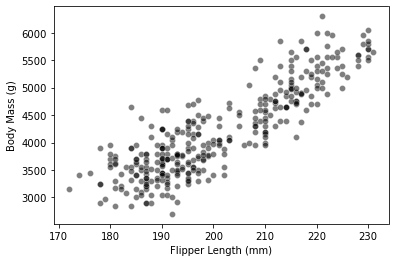

In [5]:
sns.scatterplot(x='Flipper Length (mm)', y='Body Mass (g)', data=penguins_df, color='black', alpha=0.5 )

In [6]:
def linear_model(flipper_length, weight_flipper_length, intercept_body_mass) :
    body_mass = weight_flipper_length * flipper_length + intercept_body_mass
    return body_mass

In [8]:
data, target = penguins_df[['Flipper Length (mm)']] , penguins_df['Body Mass (g)']
weight_flipper_length = 45
intercept_body_mass = -5000
flipper_length_range = np.linspace(data.min(), data.max(), num=300)

predicted_body_mass = linear_model(flipper_length_range,weight_flipper_length, intercept_body_mass)

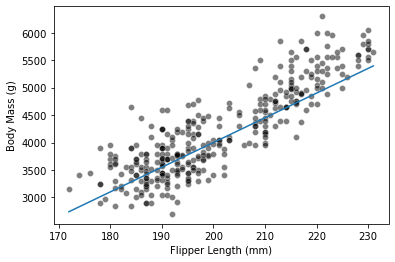

In [13]:
import matplotlib.pyplot as plt
sns.scatterplot(x='Flipper Length (mm)', y='Body Mass (g)', data=penguins_df, color='black', alpha=0.5 )
plt.plot(flipper_length_range,predicted_body_mass)
plt.show()

In [14]:
weight_flipper_length = 25
intercept_body_mass = 0

# redefined the flipper length to start at 0 to plot the intercept value
flipper_length_range = np.linspace(0, data.max(), num=300)
predicted_body_mass = linear_model(
    flipper_length_range, weight_flipper_length, intercept_body_mass)

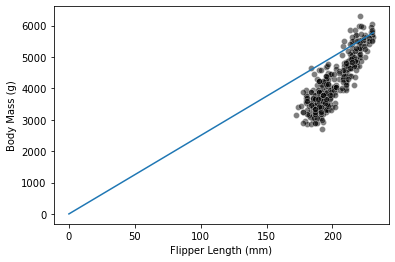

In [16]:
ax = sns.scatterplot(data=penguins_df, x='Flipper Length (mm)', y='Body Mass (g)',
                     color="black", alpha=0.5)
ax.plot(flipper_length_range, predicted_body_mass)

In [17]:
weight_flipper_length = 45
intercept_body_mass = -5000

predicted_body_mass = linear_model(
    flipper_length_range, weight_flipper_length, intercept_body_mass)

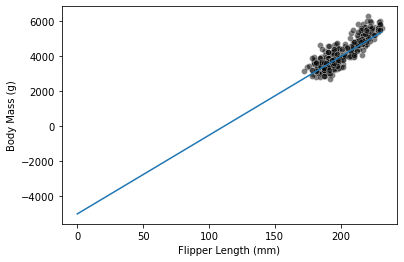

In [18]:
ax = sns.scatterplot(data=penguins_df, x='Flipper Length (mm)', y='Body Mass (g)',
                     color="black", alpha=0.5)
ax.plot(flipper_length_range, predicted_body_mass)

### Exercise

In [19]:
flipper_length_range = np.linspace(data.min(), data.max(), num=300)

In [21]:
weights = [-40, 45, 90]
intercepts = [15000, -5000, -14000]

for weight, intercept in zip(weights, intercepts) :
    print(weight, intercept)

-40 15000
45 -5000
90 -14000


In [22]:
# solution
def goodness_fit_measure(true_values, predictions):
    # we compute the error between the true values and the predictions of our
    # model
    errors = np.ravel(true_values) - np.ravel(predictions)
    # We have several possible strategies to reduce all errors to a single value.
    # Computing the mean error (sum divided by the number of element) might seem
    # like a good solution. However, we have negative errors that will misleadingly
    # reduce the mean error. Therefore, we can either square each
    # error or take the absolute value: these metrics are known as mean
    # squared error (MSE) and mean absolute error (MAE). Let's use the MAE here
    # as an example.
    return np.mean(np.abs(errors))

In [24]:
# solution
for model_idx, (weight, intercept) in enumerate(zip(weights, intercepts)):
    target_predicted = linear_model(data, weight, intercept)
    print(f"Model #{model_idx}:")
    print(f"{weight:.2f} (g / mm) * flipper length + {intercept:.2f} (g)")
    print(f"Error: {goodness_fit_measure(target, target_predicted):.3f}\n")

Model #0:
-40.00 (g / mm) * flipper length + 15000.00 (g)
Error: 2764.854

Model #1:
45.00 (g / mm) * flipper length + -5000.00 (g)
Error: 338.523

Model #2:
90.00 (g / mm) * flipper length + -14000.00 (g)
Error: 573.041



### Linear regression using scikit-learn

In [25]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(data,target)

LinearRegression()

In [29]:
weight_flipper_length = linear_regression.coef_[0]
weight_flipper_length

array([49.68556641])

In [35]:
intercept_body_mass = linear_regression.intercept_
intercept_body_mass

-5780.831358077066

In [36]:
import numpy as np

flipper_length_range = np.linspace(data.min(), data.max(), num=300)
predicted_body_mass = (
    weight_flipper_length * flipper_length_range + intercept_body_mass)

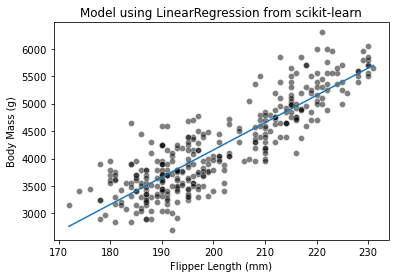

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=penguins_df, x='Flipper Length (mm)', y='Body Mass (g)',
                     color="black", alpha=0.5)
plt.plot(flipper_length_range, predicted_body_mass)
_ = plt.title("Model using LinearRegression from scikit-learn")

we mentioned two metrics: 

(i) the mean squared error

(ii) the mean absolute error. These metrics are implemented in scikit-learn and we do not need to use our own implementation.

In [39]:
from sklearn.metrics import mean_squared_error

inferred_body_mass = linear_regression.predict(data)
model_error = mean_squared_error(target, inferred_body_mass)
print(f'{model_error: .3f}')

 154546.186


In [40]:
from sklearn.metrics import mean_absolute_error

model_error = mean_absolute_error(target,inferred_body_mass)
model_error

313.0018359916963